In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
# import os
# import seaborn as sns
# import statsmodels
# from scipy.stats import shapiro
# from statsmodels.stats.anova import AnovaRM
# from scipy.stats import ttest_rel
# from statsmodels.stats.multitest import multipletests
# import itertools

colorDic = {'blue' : '#6599FF', 'yellow' :'#FFAD33', 'green' : '#198D6D',  'purple': '#683B96', 'red' : '#FF523F', 'orange': '#F97306', 'cyan': '#00FFFF', 'pink': '#FF81C0', 'lime': '#AAFF32', 'brown': '#653700'}
colors = list(colorDic.values())


In [2]:
filename = 'Data/Sorted_Questionaires_Adaptive.csv'

df = pd.read_csv(filename, index_col=None, header=0, on_bad_lines = 'skip', delimiter=';')

In [3]:
df2 = df.T.copy()
df2.columns = df2.iloc[0]
df2 = df2.iloc[1:].copy()
df2

pid,Alter,Geschlecht,Beruf/Ausbildung/Studium,Haben Sie irgendwelche Seh-Beeinträchtigungen?,Verwenden Sie visuelle Hilfsmittel?,"Haben Sie Erfahrung mit RSVP, wenn ja wie häufig pro Woche benutzen Sie RSVP?",Als wie erfahren würden Sie sich im Bezug auf VR bezeichnen?,nRS,nRS_Question 1,nRS_Question 2,...,2_Used File,2_Question 1,2_Question 2,2_Question 3,2_MR,2_PR,2_TR,2_Performance,2_Effort,2_Frustration
1,18,m,Student,Keine,Keine,Teilnahme an der Vorstudie,4,"45,87",Ja,Ja,...,a,Ja,Ja,Ja,15,5,17,8,15,13
2,25,m,Heilerziehungspfleger,Kurzsichtig,Keine,Teilnahme an der Vorstudie,5,"36,42",Ja,Nein,...,a,Nein,Nein,Ja,16,14,17,15,14,13
3,26,f,Studentin,Kurzsichtig,Brille,Teilnahme an der Vorstudie,1,"48,77",Ja,Ja,...,a,Nein,Ja,Ja,12,7,8,7,8,8
4,25,f,Studentin,Keine,Keine,Teilnahme an der Vorstudie,1,"24,33",Nein,Ja,...,a,Ja,Ja,Nein,4,2,3,6,2,1
5,25,m,Student,Kurzsichtig,Brille,Teilnahme an der Vorstudie,4,"54,79",Ja,Ja,...,b,Nein,Ja,Nein,7,9,10,8,10,5
6,58,m,Industrie Designer,Weitsichtig,Brille,Teilnahme an der Vorstudie,2,"01:40,0",Ja,Ja,...,a,Nein,Nein,Ja,16,16,15,16,14,14


In [4]:
# Count occurrences of "Ja" and "Nein" in the specified columns
ja_count = df2[["nRS_Question 1", "nRS_Question 2", "nRS_Question 3"]].apply(lambda x: x.eq("Ja").sum(), axis=1)
df2['nRS_QS'] = ja_count

ja_count = df2[["1_Question 1", "1_Question 2", "1_Question 3"]].apply(lambda x: x.eq("Ja").sum(), axis=1)
df2['1_QS'] = ja_count

ja_count = df2[["2_Question 1", "2_Question 2", "2_Question 3"]].apply(lambda x: x.eq("Ja").sum(), axis=1)
df2['2_QS'] = ja_count

In [5]:
df2

pid,Alter,Geschlecht,Beruf/Ausbildung/Studium,Haben Sie irgendwelche Seh-Beeinträchtigungen?,Verwenden Sie visuelle Hilfsmittel?,"Haben Sie Erfahrung mit RSVP, wenn ja wie häufig pro Woche benutzen Sie RSVP?",Als wie erfahren würden Sie sich im Bezug auf VR bezeichnen?,nRS,nRS_Question 1,nRS_Question 2,...,2_Question 3,2_MR,2_PR,2_TR,2_Performance,2_Effort,2_Frustration,nRS_QS,1_QS,2_QS
1,18,m,Student,Keine,Keine,Teilnahme an der Vorstudie,4,"45,87",Ja,Ja,...,Ja,15,5,17,8,15,13,3,3,3
2,25,m,Heilerziehungspfleger,Kurzsichtig,Keine,Teilnahme an der Vorstudie,5,"36,42",Ja,Nein,...,Ja,16,14,17,15,14,13,1,1,1
3,26,f,Studentin,Kurzsichtig,Brille,Teilnahme an der Vorstudie,1,"48,77",Ja,Ja,...,Ja,12,7,8,7,8,8,2,3,2
4,25,f,Studentin,Keine,Keine,Teilnahme an der Vorstudie,1,"24,33",Nein,Ja,...,Nein,4,2,3,6,2,1,2,2,2
5,25,m,Student,Kurzsichtig,Brille,Teilnahme an der Vorstudie,4,"54,79",Ja,Ja,...,Nein,7,9,10,8,10,5,2,1,1
6,58,m,Industrie Designer,Weitsichtig,Brille,Teilnahme an der Vorstudie,2,"01:40,0",Ja,Ja,...,Ja,16,16,15,16,14,14,3,2,1


In [6]:
df2['Alter'].astype('int')
age = df2['Alter']

age = [int(a) for a in age]

import statistics
statistics.stdev(age)

14.265342617687105

In [7]:
statistics.mean(age)

29.5

In [19]:
lstValues = []
lstTicks = ['nRS', '1', '2']



for column in lstTicks:
    dfX = df2[[column + '_QS']]
    lstValues.append(dfX.values.flatten())

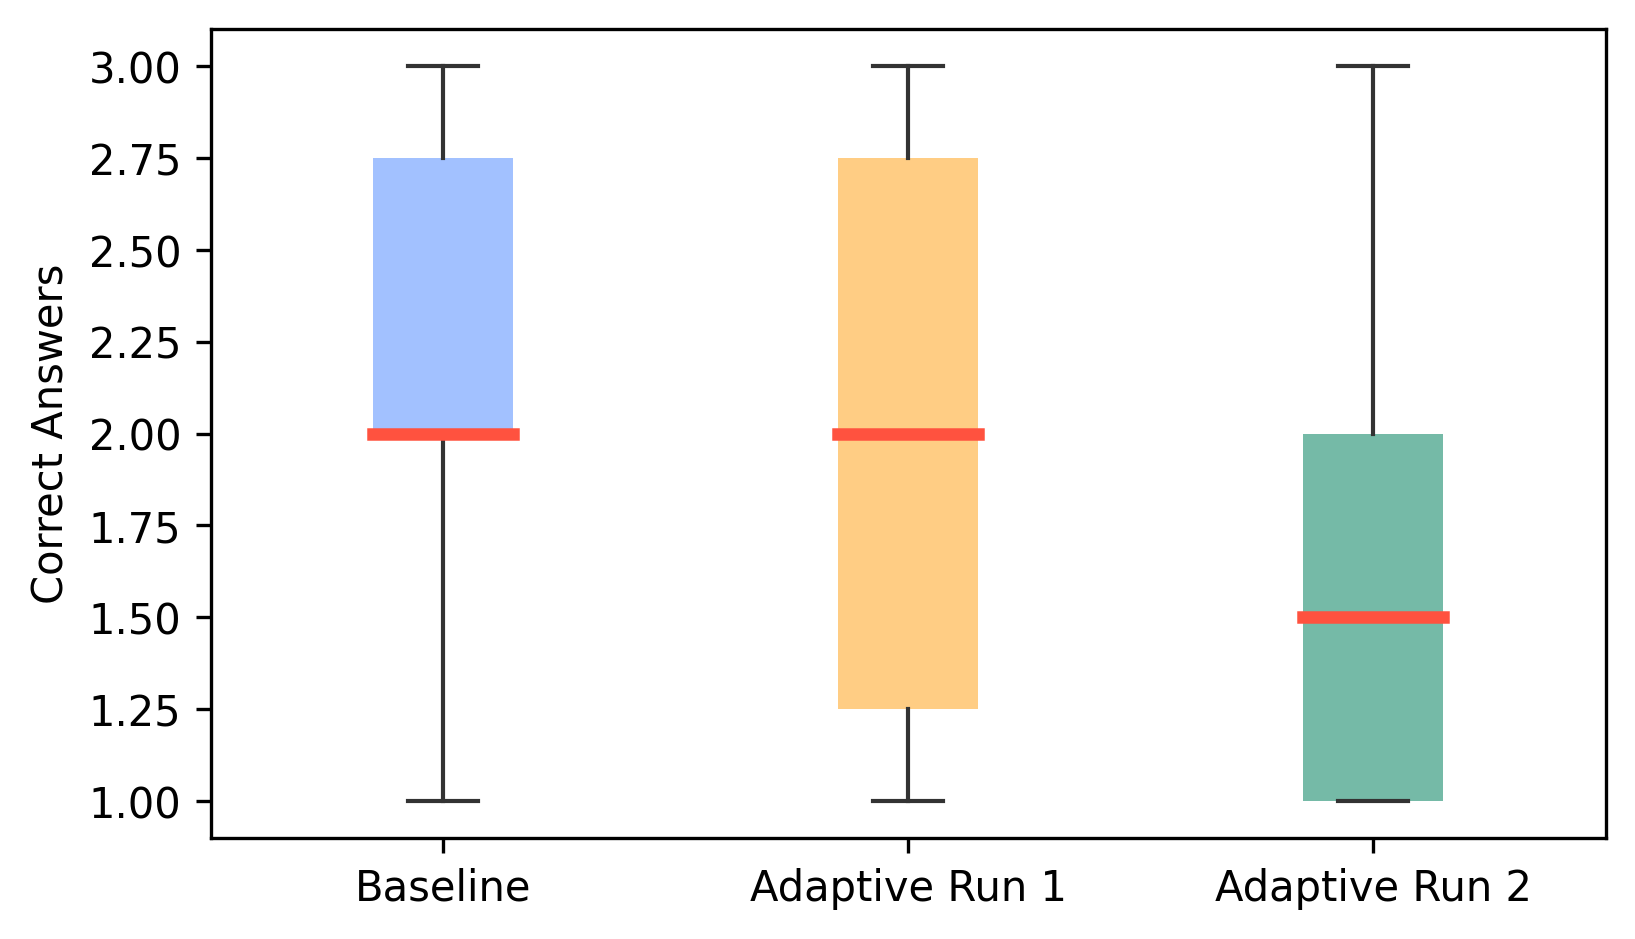

In [20]:
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

lstTicks = ['Baseline', 'Adaptive Run 1', 'Adaptive Run 2']

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Correct Answers')
ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.savefig('./figures/adaptive_compresensionquestions_overall.pdf')
plt.show()

In [54]:
# Function to convert time to seconds
def time_to_seconds(time_str):
    if ':' in time_str:
        parts = time_str.split(':')
        minutes = int(parts[0])
        seconds = float(parts[1].replace(',', '.'))
        total_seconds = minutes * 60 + seconds
    else:
        total_seconds = float(time_str.replace(',', '.'))
    return total_seconds

df2['nRS_seconds'] = df2['nRS'].apply(time_to_seconds)

In [55]:
df2.nRS_seconds.values.flatten()

array([ 45.87,  36.42,  48.77,  24.33,  54.79, 100.  ])

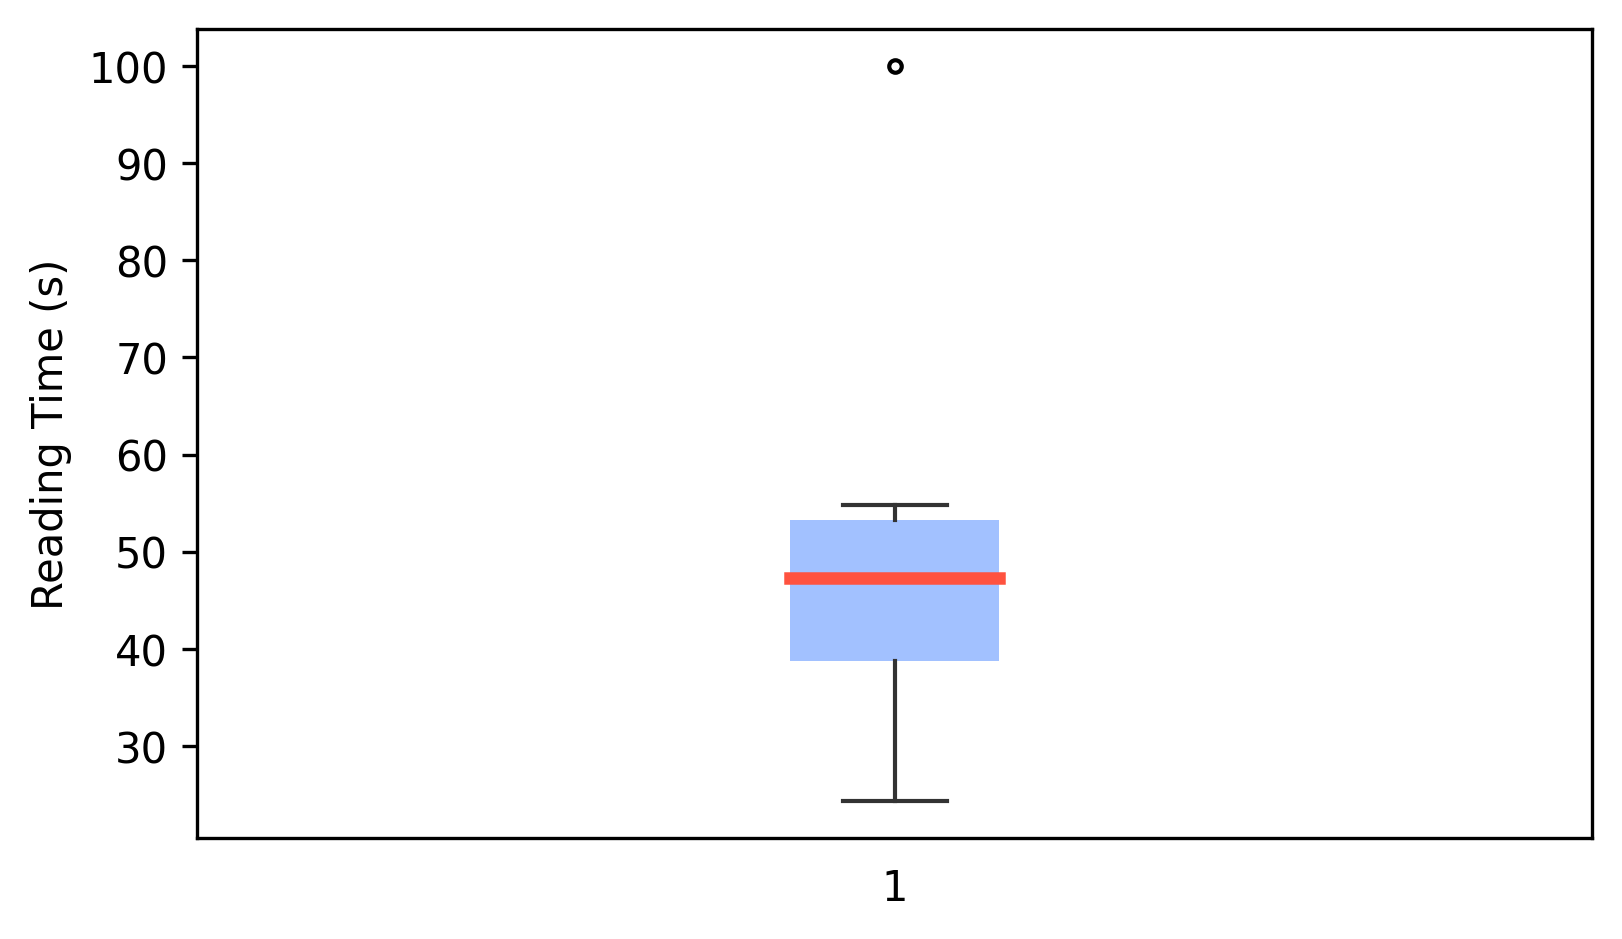

In [56]:
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(df2.nRS_seconds.values.flatten(),
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Reading Time (s)')
# ax.set_xticklabels('Pdf reading')
# ax.set_xticks([''])
# ax.set_xticks(range(1, len(lstTicks)+1), 'Pdf Reading')
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)

plt.tick_params(bottom=False)
plt.show()

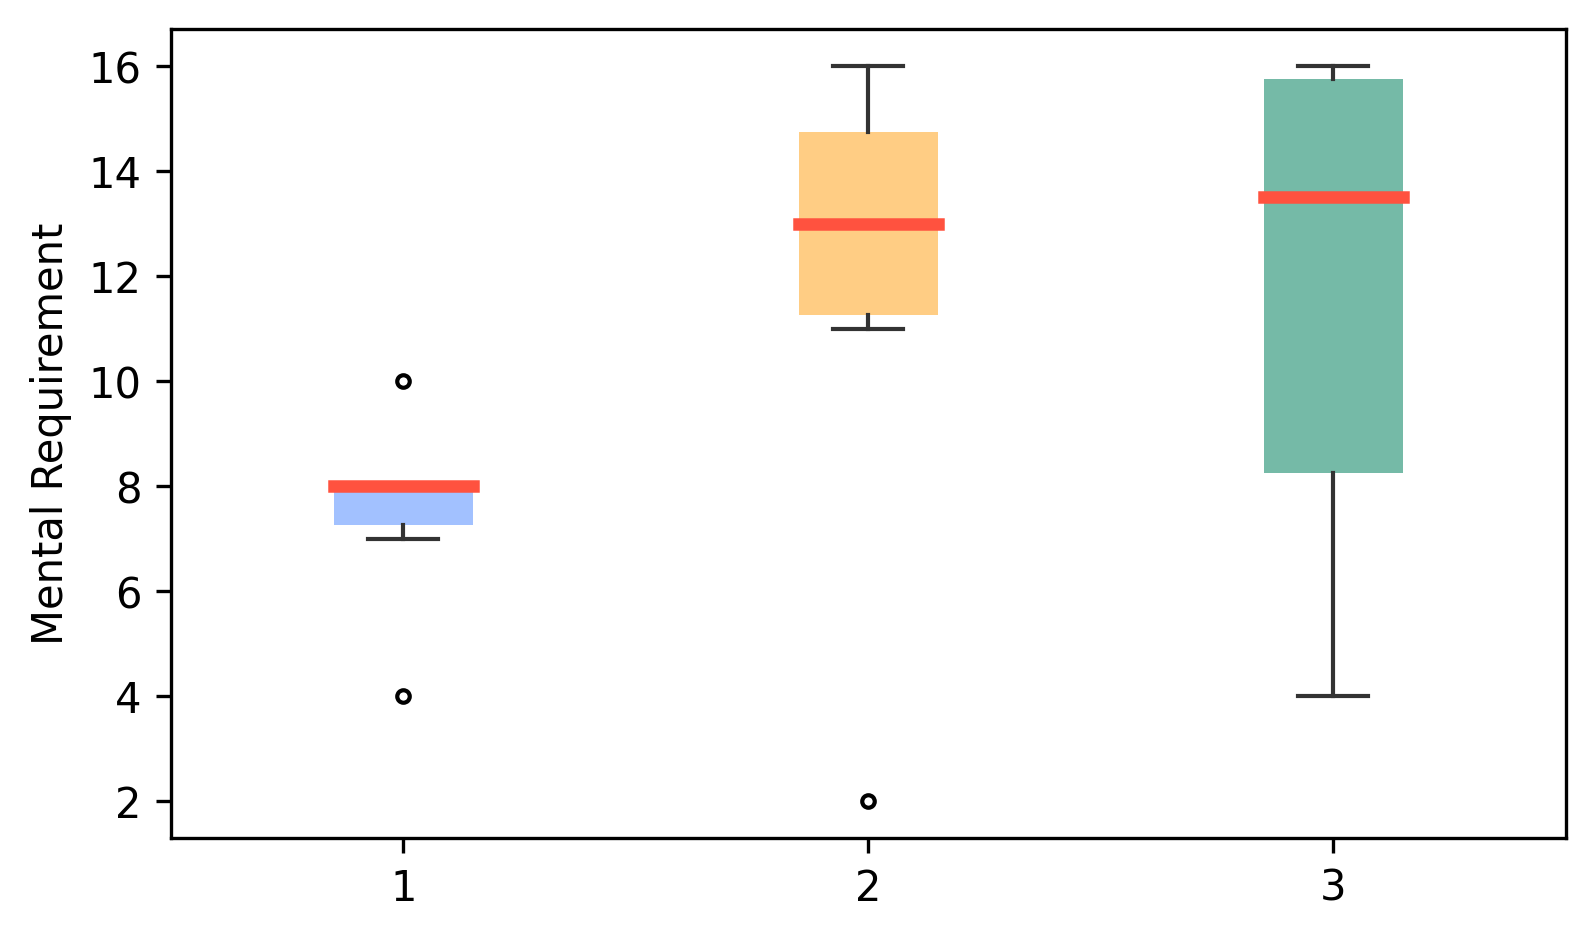

In [57]:
lstValues = []
lstTicks = ['nRS', '1', '2']

for column in lstTicks:
    dfX = df2[[column + '_MR']]
    lstValues.append(dfX.values.flatten())
    
lstValues = [np.array(arr, dtype=int) for arr in lstValues]    
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Mental Requirement')
# ax.set_xticks('')
# ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

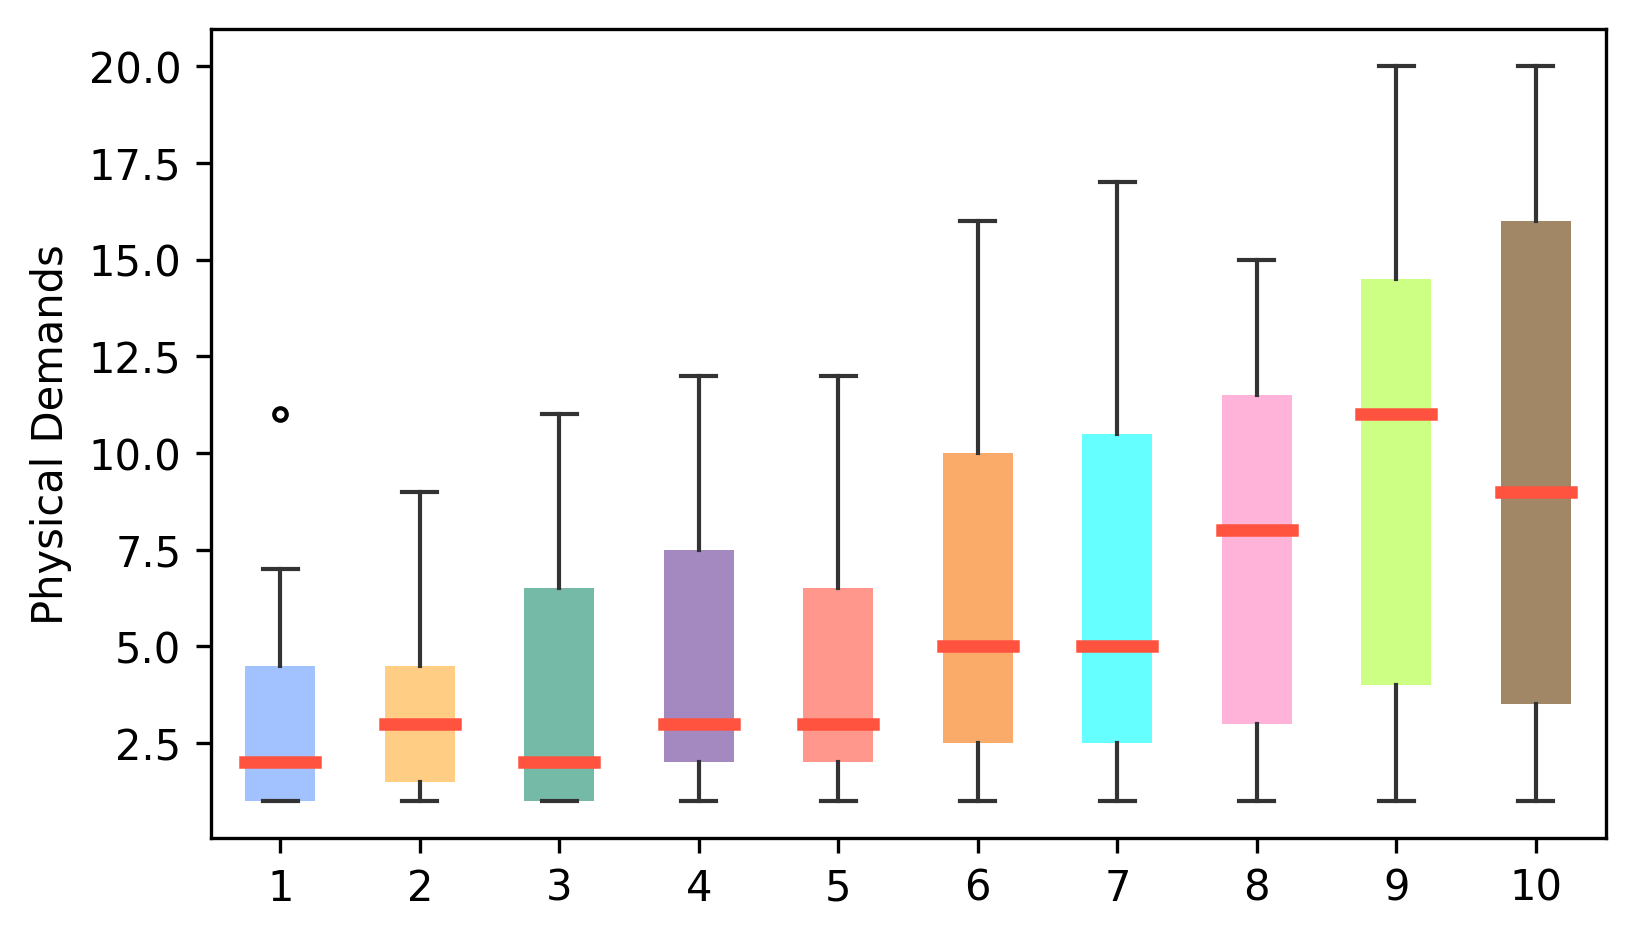

In [103]:
lstValues = []
lstTicks = ['nRS', '200', '250', '300', '350', '400', '450', '500', '550', '600']

for column in lstTicks:
    dfX = df2[[column + '_PR']]
    lstValues.append(dfX.values.flatten())
    
lstValues = [np.array(arr, dtype=int) for arr in lstValues]    
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Physical Demands')
# ax.set_xticks('')
# ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

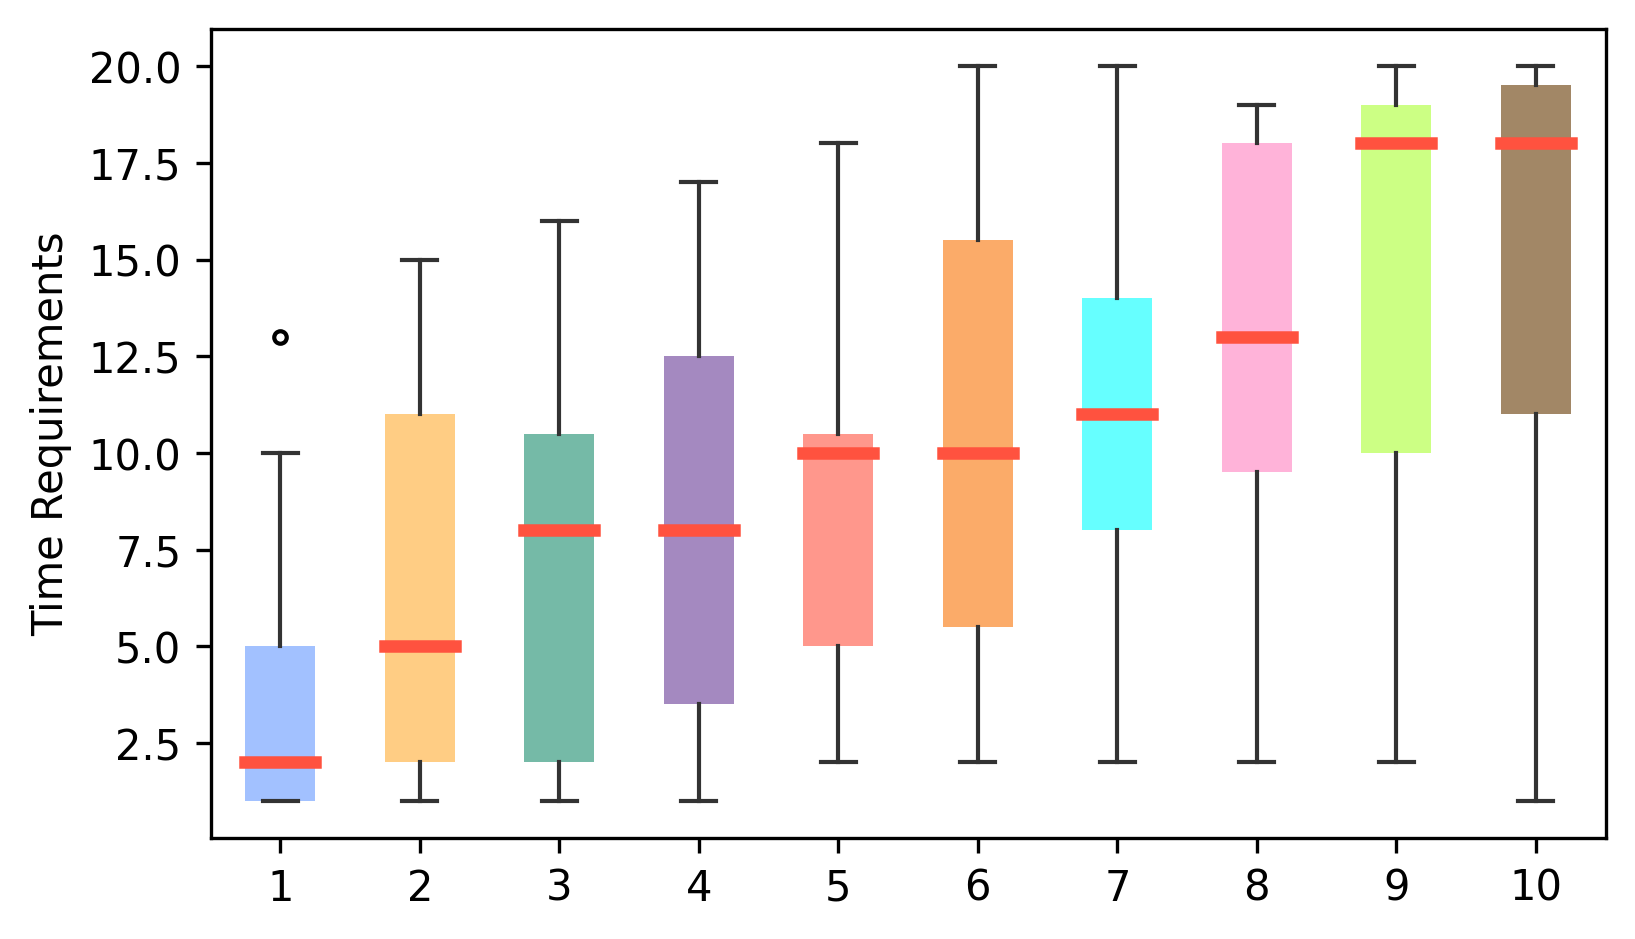

In [104]:
lstValues = []
lstTicks = ['nRS', '200', '250', '300', '350', '400', '450', '500', '550', '600']

for column in lstTicks:
    dfX = df2[[column + '_TR']]
    lstValues.append(dfX.values.flatten())
    
lstValues = [np.array(arr, dtype=int) for arr in lstValues]    
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Time Requirements')
# ax.set_xticks('')
# ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

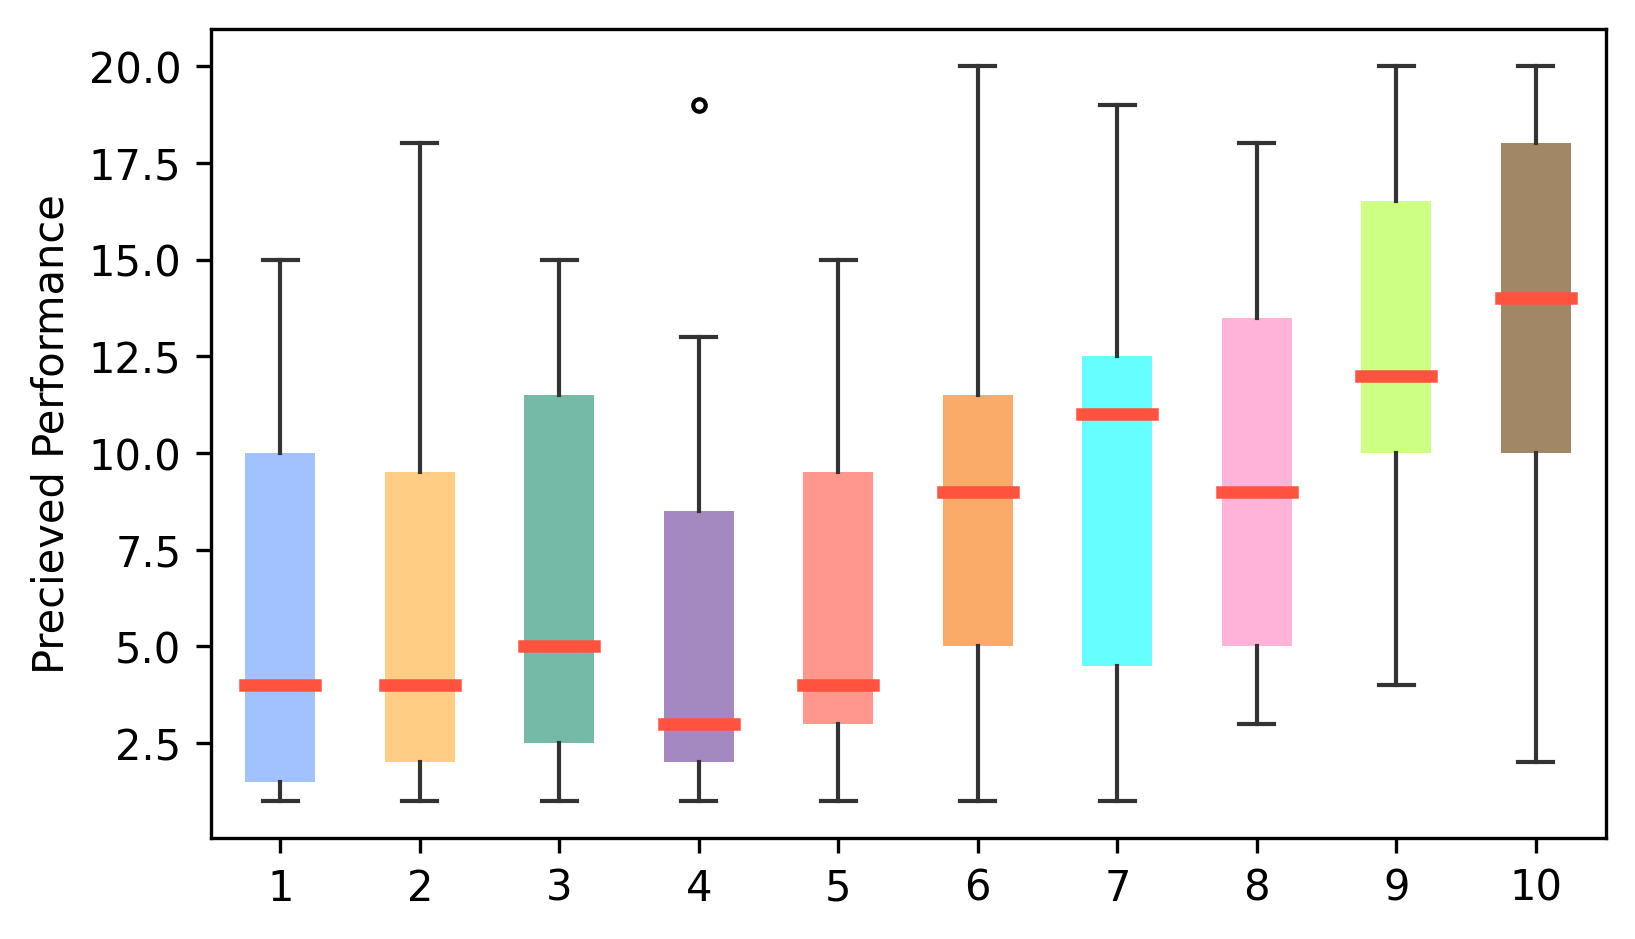

In [105]:
lstValues = []
lstTicks = ['nRS', '200', '250', '300', '350', '400', '450', '500', '550', '600']

for column in lstTicks:
    dfX = df2[[column + '_Performance']]
    lstValues.append(dfX.values.flatten())
    
lstValues = [np.array(arr, dtype=int) for arr in lstValues]    
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Precieved Performance')
# ax.set_xticks('')
# ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

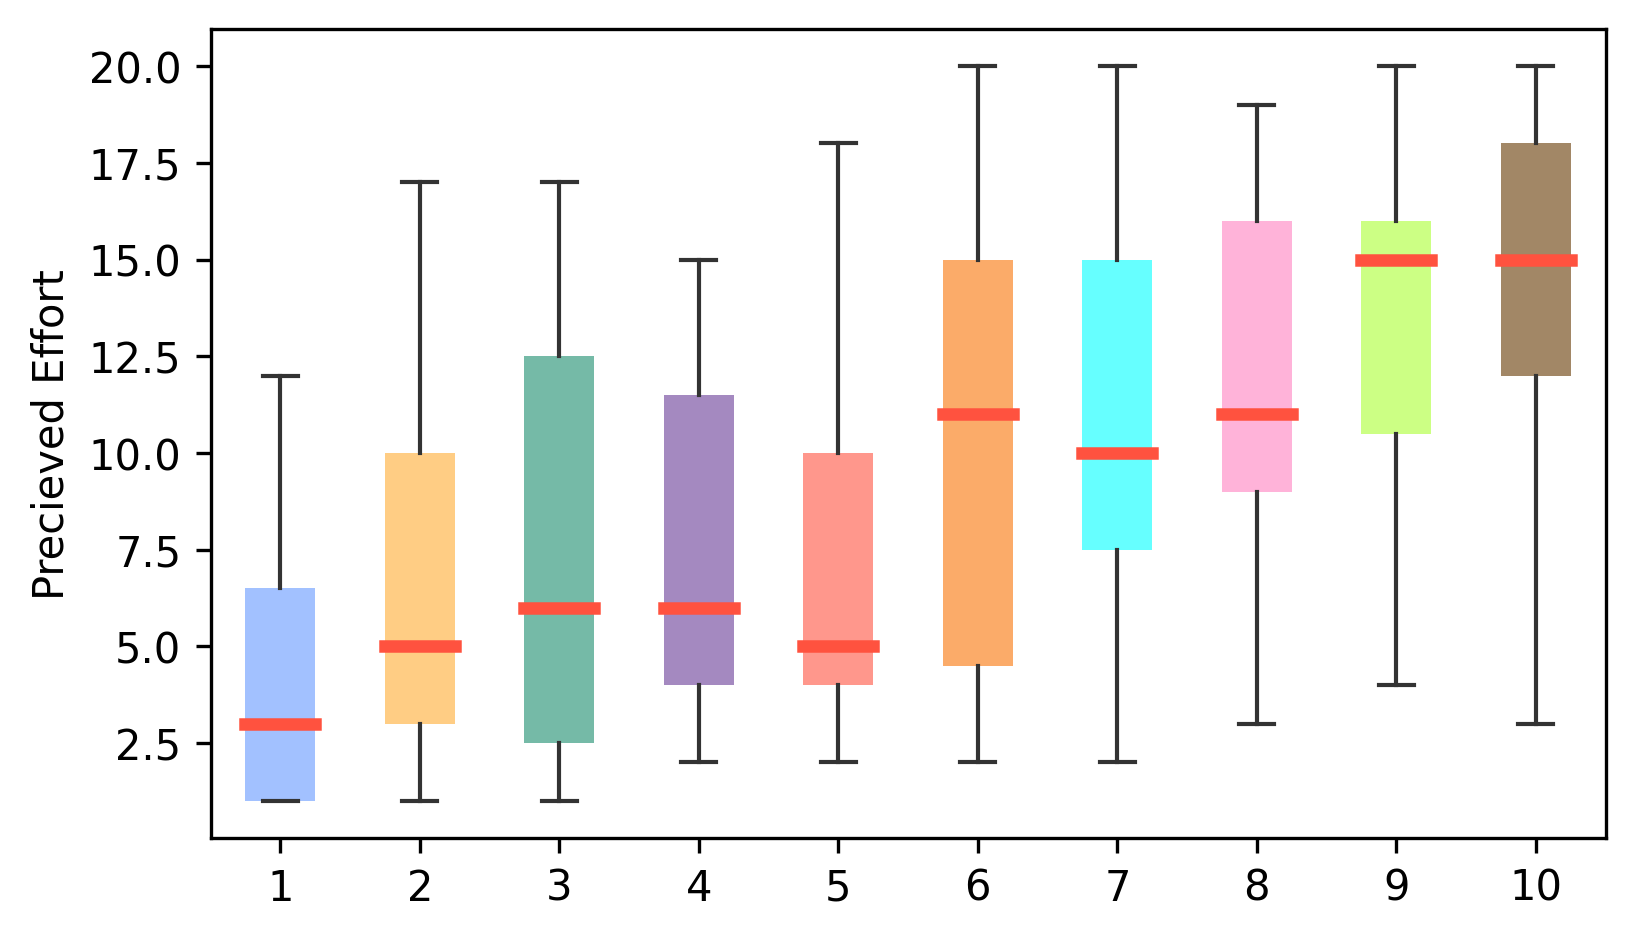

In [106]:
lstValues = []
lstTicks = ['nRS', '200', '250', '300', '350', '400', '450', '500', '550', '600']

for column in lstTicks:
    dfX = df2[[column + '_Effort']]
    lstValues.append(dfX.values.flatten())
    
lstValues = [np.array(arr, dtype=int) for arr in lstValues]    
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Precieved Effort')
# ax.set_xticks('')
# ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

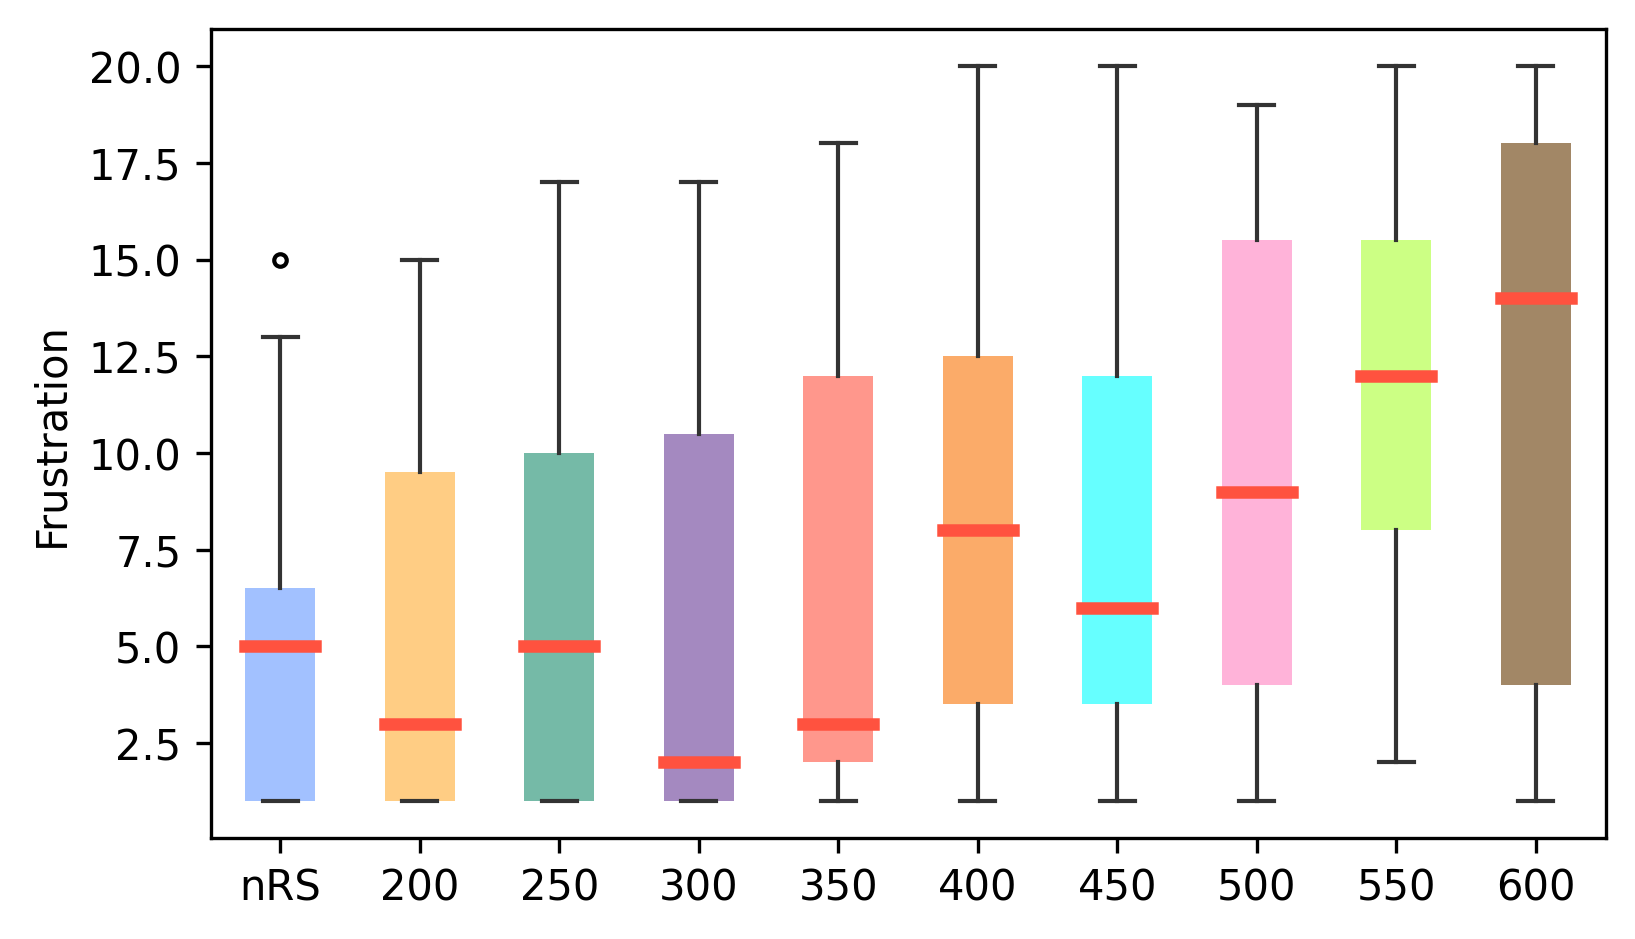

In [108]:
lstValues = []
lstTicks = ['nRS', '200', '250', '300', '350', '400', '450', '500', '550', '600']

for column in lstTicks:
    dfX = df2[[column + '_Frustration']]
    lstValues.append(dfX.values.flatten())
    
lstValues = [np.array(arr, dtype=int) for arr in lstValues]    
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('Frustration')
# ax.set_xticks('')
ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

In [109]:
df2.to_pickle('./Data/Questionaire_Main.pkl')

In [12]:
column_names = ['MR', 'PR', 'TR', 'Performance', 'Effort', 'Frustration']

columns_to_sum = [f'nRS_{col}' for col in column_names]
lst = df2[columns_to_sum].values
lst = [np.array(arr, dtype=int).sum() for arr in lst]    
df2['nRS_Sum'] = lst

for i in range(1, 3, 1):
    columns_to_sum = [f'{i}_{col}' for col in column_names]
    lst = df2[columns_to_sum].values
    lst = [np.array(arr, dtype=int).sum() for arr in lst]    
    df2[f'{i}_Sum'] = lst
    
df2

pid,Alter,Geschlecht,Beruf/Ausbildung/Studium,Haben Sie irgendwelche Seh-Beeinträchtigungen?,Verwenden Sie visuelle Hilfsmittel?,"Haben Sie Erfahrung mit RSVP, wenn ja wie häufig pro Woche benutzen Sie RSVP?",Als wie erfahren würden Sie sich im Bezug auf VR bezeichnen?,nRS,nRS_Question 1,nRS_Question 2,...,2_TR,2_Performance,2_Effort,2_Frustration,nRS_QS,1_QS,2_QS,nRS_Sum,1_Sum,2_Sum
1,18,m,Student,Keine,Keine,Teilnahme an der Vorstudie,4,"45,87",Ja,Ja,...,17,8,15,13,3,3,3,40,65,73
2,25,m,Heilerziehungspfleger,Kurzsichtig,Keine,Teilnahme an der Vorstudie,5,"36,42",Ja,Nein,...,17,15,14,13,1,1,1,31,80,89
3,26,f,Studentin,Kurzsichtig,Brille,Teilnahme an der Vorstudie,1,"48,77",Ja,Ja,...,8,7,8,8,2,3,2,28,44,50
4,25,f,Studentin,Keine,Keine,Teilnahme an der Vorstudie,1,"24,33",Nein,Ja,...,3,6,2,1,2,2,2,24,10,18
5,25,m,Student,Kurzsichtig,Brille,Teilnahme an der Vorstudie,4,"54,79",Ja,Ja,...,10,8,10,5,2,1,1,22,81,49
6,58,m,Industrie Designer,Weitsichtig,Brille,Teilnahme an der Vorstudie,2,"01:40,0",Ja,Ja,...,15,16,14,14,3,2,1,45,91,91


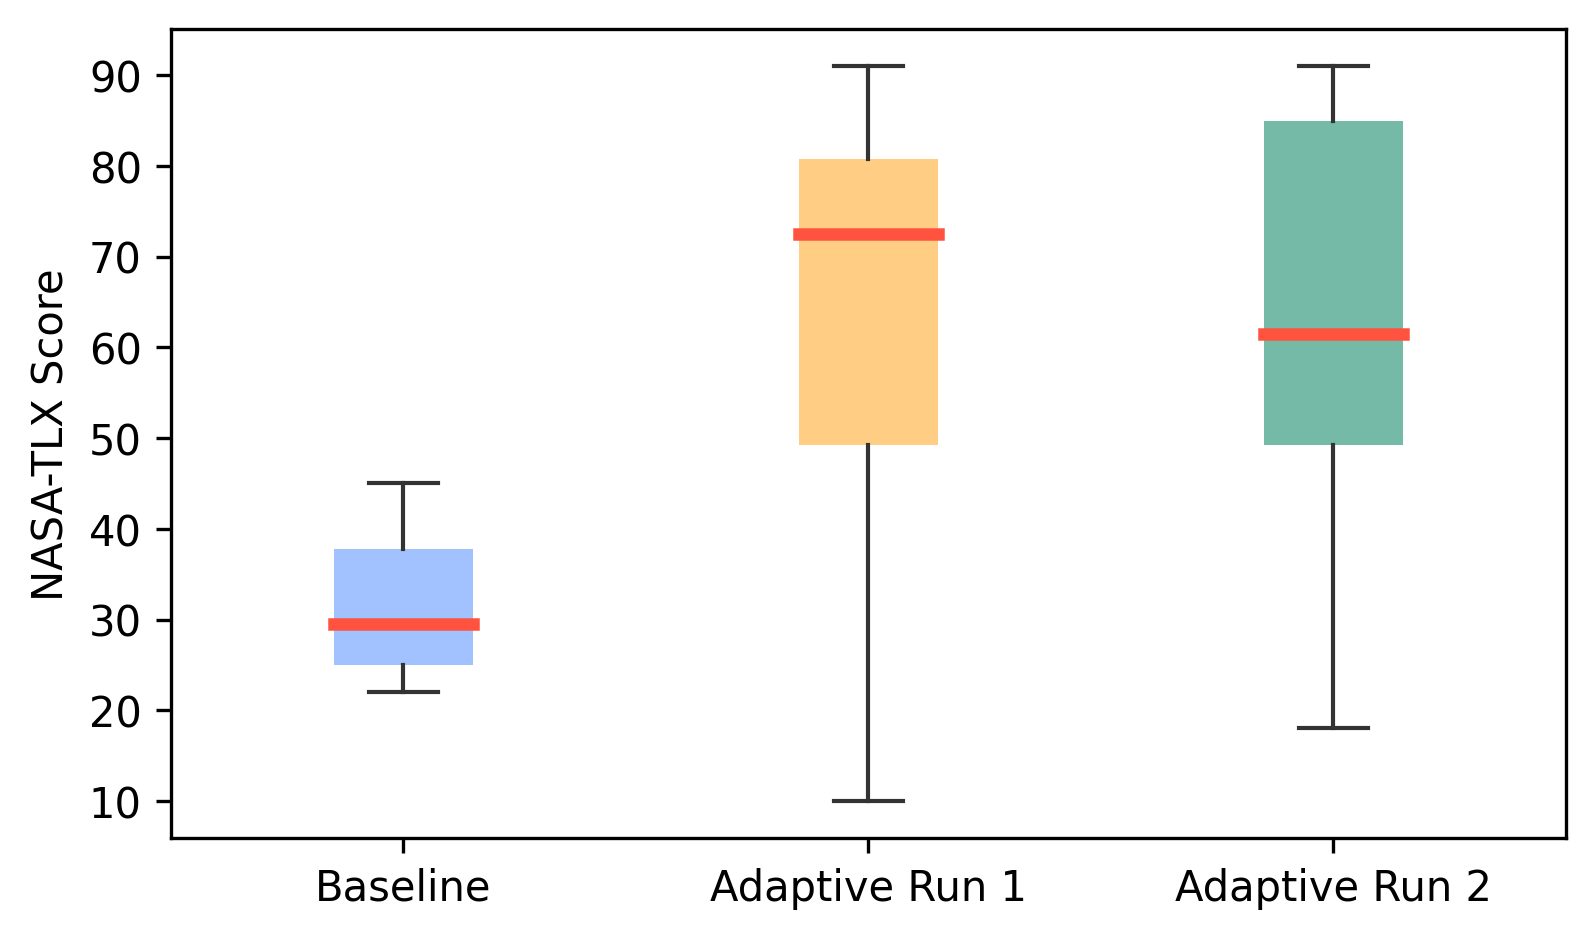

In [16]:
lstValues = []
lstTicks = ['nRS', '1', '2']

for column in lstTicks:
    dfX = df2[[column + '_Sum']]
    lstValues.append(dfX.values.flatten())
    
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(lstValues,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

lstTicks = ['Baseline', 'Adaptive Run 1', 'Adaptive Run 2']

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('NASA-TLX Score')
# ax.set_xticks('')
ax.set_xticks(range(1, len(lstTicks)+1), lstTicks)
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)

plt.savefig('./figures/adaptive_nasatlx_overall.pdf')
plt.show()

In [63]:
df2

pid,Alter,Geschlecht,Beruf/Ausbildung/Studium,Haben Sie irgendwelche Seh-Beeinträchtigungen?,Verwenden Sie visuelle Hilfsmittel?,"Haben Sie Erfahrung mit RSVP, wenn ja wie häufig pro Woche benutzen Sie RSVP?",Als wie erfahren würden Sie sich im Bezug auf VR bezeichnen?,nRS,nRS_Question 1,nRS_Question 2,...,2_Performance,2_Effort,2_Frustration,nRS_QS,1_QS,2_QS,nRS_seconds,nRS_Sum,1_Sum,2_Sum
1,18,m,Student,Keine,Keine,Teilnahme an der Vorstudie,4,"45,87",Ja,Ja,...,8,15,13,3,3,3,45.87,40,65,73
2,25,m,Heilerziehungspfleger,Kurzsichtig,Keine,Teilnahme an der Vorstudie,5,"36,42",Ja,Nein,...,15,14,13,1,1,1,36.42,31,80,89
3,26,f,Studentin,Kurzsichtig,Brille,Teilnahme an der Vorstudie,1,"48,77",Ja,Ja,...,7,8,8,2,3,2,48.77,28,44,50
4,25,f,Studentin,Keine,Keine,Teilnahme an der Vorstudie,1,"24,33",Nein,Ja,...,6,2,1,2,2,2,24.33,24,10,18
5,25,m,Student,Kurzsichtig,Brille,Teilnahme an der Vorstudie,4,"54,79",Ja,Ja,...,8,10,5,2,1,1,54.79,22,81,49
6,58,m,Industrie Designer,Weitsichtig,Brille,Teilnahme an der Vorstudie,2,"01:40,0",Ja,Ja,...,16,14,14,3,2,1,100.00,45,91,91


In [64]:
lstValues = []
lstTicks = ['nRS', '1', '2']

for column in lstTicks:
    dfX = df2[[column + '_Sum']]
    lstValues.append(dfX.values.flatten())

In [71]:
# Transpose the original data
transposed_data = [[row[i] for row in lstValues] for i in range(len(lstValues[0]))]


AttributeError: 'DataFrame' object has no attribute 'Alter'

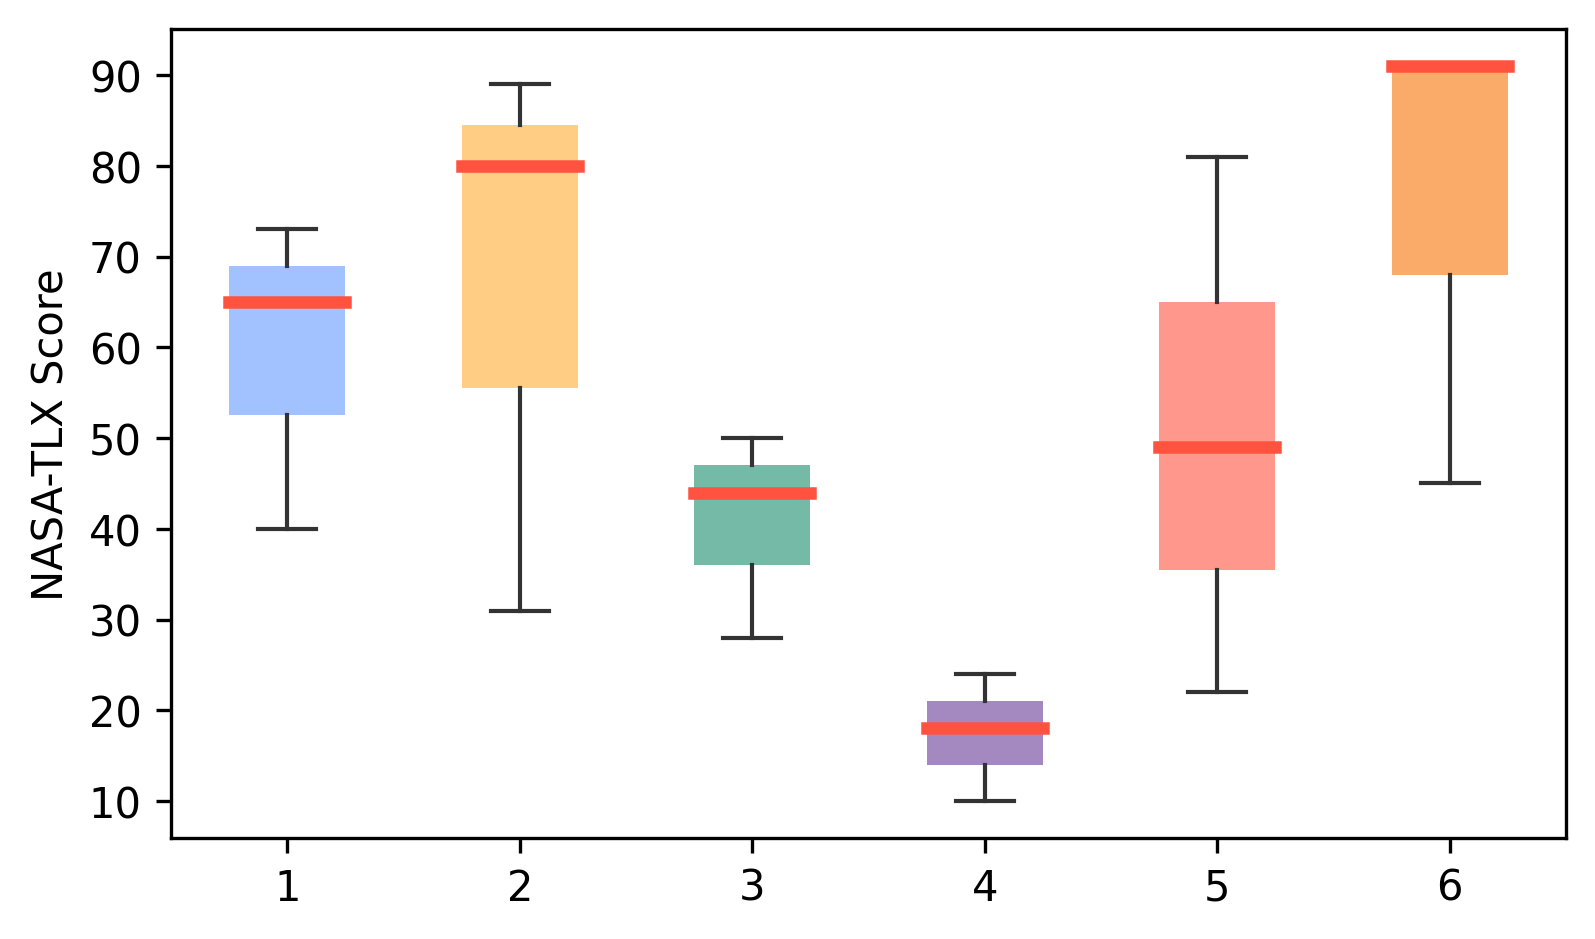

In [72]:
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)
bp = ax.boxplot(transposed_data,
            medianprops = dict(color = 'black'), 
            flierprops = dict(markersize = 3), patch_artist=True)

for i, box in enumerate(bp['boxes']):
    #box.set(color=‘#333333’)
    box.set(linewidth=0)
    box.set(color=colors[i]) # #0072BD
    box.set(alpha=.6)
for whisker in bp['whiskers']:
    whisker.set(color='#333333')
    whisker.set(linewidth=1)
for median in bp['medians']:
    median.set(color=colorDic['red'])
    median.set(linewidth=3)
for mean in bp['means']:
    mean.set(marker='o')
for cap in bp['caps']:
    cap.set(color='#333333')
    cap.set(linewidth=1)

ax.set_ylabel('NASA-TLX Score')
# ax.set_xticks('')
ax.set_xticks(range(1, len(dfX.Alter)+1), range(1, len(dfX.Alter) + 1))
# ax.plot(range(1, len(lstTicks)+1), y_pred, c=colors[-1])

# yMax = 0.75
# ax.set_ylim(yMax*-1,yMax)
# ax.set_ylim(-yMax,yMax)


plt.show()

In [18]:
df2.to_pickle('./Data/Questionaire_Adaptive.pkl')
df2.to_csv('./Data/Adaptive_merged.csv')